# **Business Understanding**

To support the launch of a new movie studio, this project aims to deliver data-driven insights into what makes films successful by analyzing trends in budgets, profitability, film length, director performance, and genre ratings. Using CRISP-DM methodology, we will gather and clean data from various film databases, address inconsistencies, and apply statistical analysis to uncover patterns that can guide strategic decisions. The findings will help the company select the right genres, directors, and production strategies to produce competitive, high-performing content in a rapidly evolving entertainment industry.The following are our objectives
 
 1:Evaluating the Relationship Between production Budget and Profitability

 2.Determine if there is a difference in audience ratings between the shorter and longer films

 3.Identify the Best Directors to Work With

 4.To identify the genres that are linked to high average rating
 

# **Data Understanding**
In the data understanding phase, we explored two datasets—The Numbers, which includes financial details like production budgets and box office revenue, and IMDb, which provides movie metadata such as ratings, genres, runtime, and director information. We examined key columns from both datasets and performed essential data quality checks, including identifying missing values (e.g., in runtime_minutes and averagerating), detecting outliers in budget and rating fields, ensuring uniform formatting, and addressing duplicate entries in the IMDb data. We also verified proper merging across tables using unique identifiers like movie_id and person_id to maintain data integrity.

# **Data Preparation**

In the Data Preparation section, we will outline the steps taken to clean, transform, and organize the datasets from The Numbers and IMDb to ensure they are suitable for analysis. This includes handling missing values, removing duplicates, converting data types, merging datasets, and creating new variables such as movie runtime categories for comparative analysis.

## **Data Cleaning**

In [1]:
# Import the necessary libraries 
import pandas as pd
pd.options.mode.chained_assignment = None          #prevent unnecessary warnings from pandas so our notebook looks cleaner
import sqlite3

**1. The Numbers dataset**

In [2]:
# Load the dataframe
tn_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
tn_df.head()



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# Gives us a concise summary of our dataframe by giving us basic information of the dataframe
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From our findings above, we can see that our dataframe has 5782 entries and 6 columns in total. We have 5 columns in the string format and one other column in the integer format(int64). 

In [4]:
# Check the summary statistics of our dataframe
tn_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [5]:
# Shows us the number of rows and columns in our dataframe
print('The dataframe contains:', tn_df.shape[0],'rows')
print('The dataframe contains:', tn_df.shape[1],'columns')


The dataframe contains: 5782 rows
The dataframe contains: 6 columns


**Handling missing values and duplicate values**

In [6]:
#First check for null values
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no missing values in our dataframe.

In [7]:
#Check for duplicates
tn_df.duplicated().sum()

0

We can also see that our dataframe has no duplicates.We also have no need for the release date column in our dataframe so we will drop it. 

In [8]:
# Dropping the release_date column
tn_df= tn_df.drop('release_date', axis=1)
tn_df

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0
5778,79,Following,"$6,000","$48,482","$240,495"
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,A Plague So Pleasant,"$1,400",$0,$0


**Cleaning the production_budget, domestic_gross and worldwide_gross columns**

In [9]:
# Checking the datatypes
tn_df.dtypes

id                    int64
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

Our columns represent financial information so its important for us to work with them in integer or float form so that we are able to perform mathematical operations on them. Since the three columns have object data types, we will convert them into integers.

In [10]:
# Removing the dollar signs and commas from the columns
tn_df['worldwide_gross']= tn_df['worldwide_gross'].replace('[\$,]', '', regex= True)
tn_df['production_budget']= tn_df['production_budget'].replace('[\$,]', '', regex= True)
tn_df['domestic_gross']= tn_df['domestic_gross'].replace('[\$,]', '', regex= True)

# Converting the columns into integers
tn_df['worldwide_gross']= tn_df['worldwide_gross'].astype('int64')
tn_df['production_budget']= tn_df['production_budget'].astype('int64')
tn_df['domestic_gross']= tn_df['domestic_gross'].astype('int64')

# Previewing the first five results
tn_df.head()


,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,425000000,760507625,2776345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Dark Phoenix,350000000,42762350,149762350
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [11]:
# Checking to see if there are any 0 values in our worldwide_gross column
(tn_df['worldwide_gross'] == 0).sum()

367

We have 367 zero values in our column, we will drop these records and retain the rest.

In [12]:
# Retaining the rows where the values in the worldwide_gross is greater than zero
tn_df = tn_df[tn_df['worldwide_gross'] > 0]

# Checking that the zero values have been dropped
assert (tn_df['worldwide_gross']== 0).sum() == 0

**Checking for outliers in the production_budget column**

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = tn_df['production_budget'].quantile(0.25)
Q3 = tn_df['production_budget'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = tn_df[(tn_df['production_budget'] < lower_bound) | (tn_df['production_budget'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers[['production_budget']])

Number of outliers: 411
     production_budget
0            425000000
1            410600000
2            350000000
3            330600000
4            317000000
..                 ...
407           99000000
408           99000000
409           98000000
410           97000000
411           97000000

[411 rows x 1 columns]


We keep the outliers since these are true values. 

**Checking for outliers in the worldwide_gross column**

In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = tn_df['worldwide_gross'].quantile(0.25)
Q3 = tn_df['worldwide_gross'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = tn_df[(tn_df['worldwide_gross'] < lower_bound) | (tn_df['worldwide_gross'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers[['worldwide_gross']])

Number of outliers: 564
      worldwide_gross
0          2776345279
1          1045663875
3          1403013963
4          1316721747
5          2053311220
...               ...
4249        278964806
4567        390525192
4589        261249383
4775        263591415
5346        268000000

[564 rows x 1 columns]


We also keep the outliers in the worldwide_gross column.

Now we will create a profit column that will allow us to see the profitability of each movie.



In [15]:
# Subtracting the production_budget from the worldwide_gross to calculate profit
tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

# Previewing the first five rows
tn_df.head()


,id,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,Avatar,425000000,760507625,2776345279,2351345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


**2.im.db**

In [16]:
# Load the data
import zipfile

# Extract the database file from the ZIP archive
with zipfile.ZipFile('zippedData\im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

# Connect to the extracted SQLite database
conn = sqlite3.connect('zippedData/im.db')

query = "SELECT name FROM sqlite_master WHERE type='table';"

tables = pd.read_sql_query(query, conn)

print("Tables in the database:")
print(tables)

Tables in the database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


**Join the relevant columns**

In [17]:
#Join the persons.directors,movie basics and movie ratings tables
query = """
    SELECT *
    FROM (
        SELECT *
        FROM persons
        JOIN directors USING (person_id)
        JOIN movie_basics USING (movie_id)
        JOIN movie_ratings USING (movie_id)
    ) AS subquery;
"""
imdb_df = pd.read_sql(query, conn)
imdb_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
1,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
2,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
3,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
4,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt2057445,No Other Woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller",6.4,256


In [18]:
#Drop the irrelevant columns
imdb_df = imdb_df.drop(['birth_year', 'death_year', 'primary_profession', 'start_year', 'numvotes', 'primary_title', 'original_title'], axis=1)
imdb_df.head()

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
1,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
2,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
3,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101.0,"Drama,Romance,Thriller",6.4


In [19]:
#Check the information of the  dataframe
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   person_id        181387 non-null  object 
 1   primary_name     181387 non-null  object 
 2   movie_id         181387 non-null  object 
 3   runtime_minutes  163584 non-null  float64
 4   genres           180047 non-null  object 
 5   averagerating    181387 non-null  float64
dtypes: float64(2), object(4)
memory usage: 8.3+ MB


In [20]:
# Check the summary statistics 
imdb_df.describe()

,runtime_minutes,averagerating
count,163584.000000,181387.000000
mean,97.789484,6.217683
std,194.434689,1.388026
min,3.000000,1.000000
25%,84.000000,5.400000
50%,94.000000,6.300000
75%,107.000000,7.200000
max,51420.000000,10.000000


In [21]:
# Display the number of rows and columns im the dataframe
print('The dataframe contains:', imdb_df.shape[0],'rows')
print('The dataframe contains:', imdb_df.shape[1],'columns')


The dataframe contains: 181387 rows
The dataframe contains: 6 columns


**Handling the missing values**

In [22]:
# Check for the null values in the dataframe
imdb_df.isnull().sum()

person_id              0
primary_name           0
movie_id               0
runtime_minutes    17803
genres              1340
averagerating          0
dtype: int64

In [23]:
# Drop the records with missing values
imdb_df.dropna(subset=['runtime_minutes', 'genres'], inplace= True)


In [24]:
# Change the runtime_minutes to the integer format
imdb_df['runtime_minutes']= imdb_df['runtime_minutes'].astype('int64')

In [25]:
# Verifying the column for runtime_minutes is changed
assert imdb_df['runtime_minutes'].dtype == 'int64', "Conversion to int64 failed"

## **Exploratory Data Analysis**

In this section, we perform Exploratory Data Analysis (EDA) to summarize and visualize the
main characteristics of our datasets which will be useful for addressing the objectives


*Objective 1:Evaluating the Relationship Between production Budget and Profitability*

**Univariate Analysis**

In this section, we examine the distribution of the production budget variable using a combination of a histogram and a Kernel Density Estimate (KDE) plot. This helps visualize how production budgets are spread across different movies, highlighting patterns such as skewness and the presence of extreme values. By understanding this distribution, we can make informed decisions about how to handle the data in later stages of analysis.

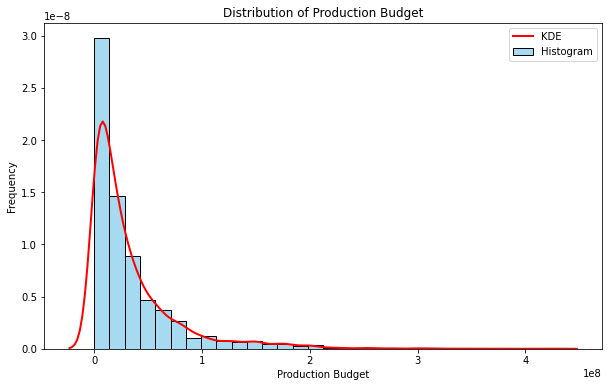

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Histogram and KDE together
plt.figure(figsize=(10, 6))
sns.histplot(tn_df['production_budget'], bins=30, color='skyblue', edgecolor='black', stat='density', label='Histogram')
sns.kdeplot(tn_df['production_budget'], color='red', linewidth=2, label='KDE')
plt.title('Distribution of Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.legend()
plt.show()



**Distribution of Production Budgets in Relation to Movie Frequency**  
- Most films are produced with relatively low budgets, as shown by the concentration of entries on the lower end of the budget range.  
- There is a noticeable decline in the number of movies as production budgets rise, indicating that high-budget films are less common.

**Bivariate Analysis**

 **Relationship Between Production Budgets and Profits for Movies**


Bivariate analysis examines the relationship between two variables. It helps you understand how one variable changes in relation to another—whether there's a correlation, trend, or association between them. So we are going to be comparing production budget and profit to see if higher budgets lead to more profit.

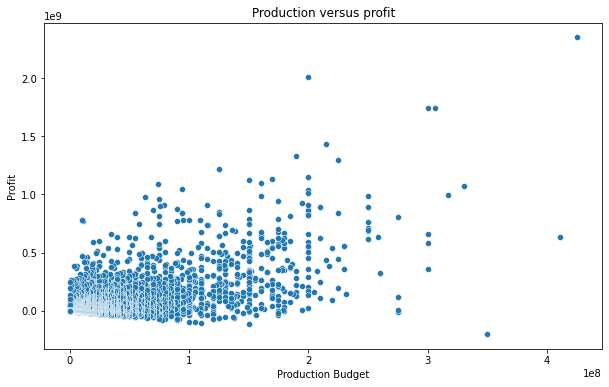

In [27]:

# Calculate the profit column
tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

# Creating the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='profit', data = tn_df)
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.title('Production versus profit')
plt.show();

The scatter plot shows that movies with larger production budgets tend to generate higher profits, as indicated by the greater concentration of high-profit points at the upper end of the budget scale.

**Multivariate analysis**



In the Multivariate Analysis section, we explore the relationships among more than two variables at once. This broader perspective allows for a more thorough understanding of the data's complexity, revealing patterns, associations, and key factors essential for developing strong and precise predictive models.

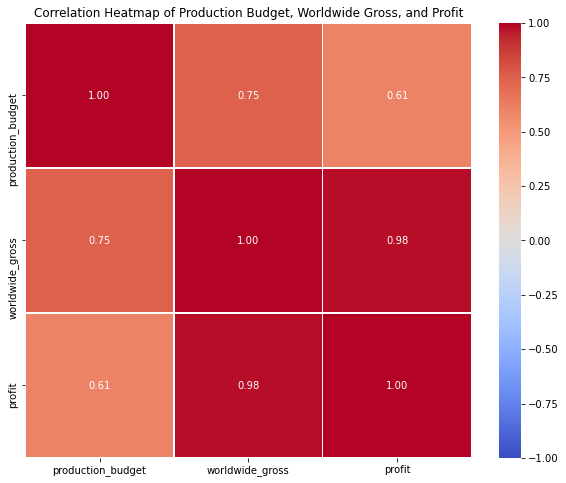

In [28]:
# Select the columns to use
columns = ['production_budget', 'worldwide_gross', 'profit']
# Creating a subset of the DataFrame with the specified columns
Heatmap_df = tn_df[columns]
# Computing the correlation matrix
corr_matrix = Heatmap_df.corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Production Budget, Worldwide Gross, and Profit')
plt.show()

Production Budget versus. Worldwide Gross: There is a strong positive correlation of 0.75 indicating that movies with larger production budgets typically achieve higher worldwide gross revenues.

Production Budget versus. Profit: A moderate positive correlation of 0.61 suggests that increasing the production budget often leads to higher profits, though this link is not as strong as with worldwide gross.

Worldwide Gross versus Profit: Although the specific correlation value isn't provided, the relationship is expected to be strong, given the positive ties both metrics have with production budget.

## **Hypothesis Testing** 

Evaluating the Relationship Between production Budget and Profitability


To better understand how financial inputs and outcomes are interconnected in the film industry, we aim to assess whether a movie’s production budget  significantly influence its profitability. This exploration is grounded in the following hypotheses:

H₀:There is no significant linear relationship between production budget and  profitability.

H₁:There is a significant linear relationship between production budget and profitability.



**The Pearson correlation coefficient was computed to determine the linear association between production budget and profit.**

In [29]:
from scipy.stats import pearsonr

# set the alpha to 0.05
alpha = 0.05
# Calculate both the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(tn_df['production_budget'], tn_df['profit'])
print(f"The P-value is : {p_value}")
print(f"The Pearson Correlation Coefficient is: {correlation}")

if p_value < alpha:
	print("Reject the null hypothesis.There is a significant linear relationship between the profit and production budget")
else:
	print("Fail to reject the null hypothesis. There is no sufficient evidence to show a linear relationship between the profit and production budget")


The P-value is : 0.0
The Pearson Correlation Coefficient is: 0.6068652923681527
Reject the null hypothesis.There is a significant linear relationship between the profit and production budget


From the output above we can clearly see that A moderate positive correlation of 0.61 suggests that increasing the production budget often leads to higher profits, though this link is not as strong as with worldwide gross.
Moreover from our correlation matrix we can see that there is a strong positive correlation of 0.75 indicating that movies with larger production budgets typically achieve higher worldwide gross revenues.
 
 This could further be shown visually as shown in the figure below



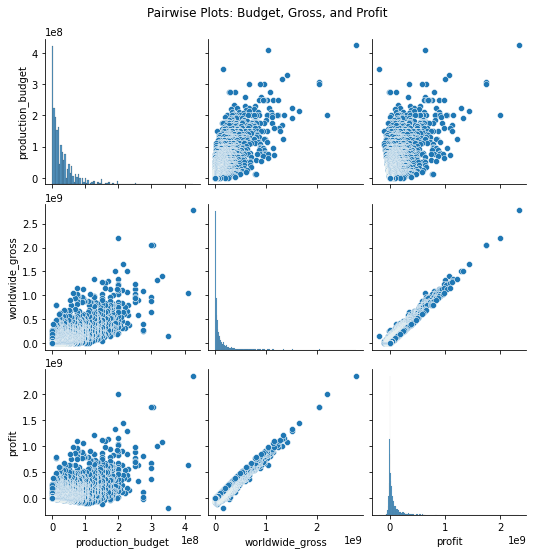

In [30]:
# Pairplot for visualization
sns.pairplot(tn_df[['production_budget', 'worldwide_gross', 'profit']])
plt.suptitle('Pairwise Plots: Budget, Gross, and Profit', y=1.02)
plt.show()

**Performing a linear regression model based on the production_budget and profitability**

In [52]:
#Testing for the equality of variances using the levene's test
from scipy.stats import levene

stat, p = levene(tn_df['production_budget'], tn_df['profit'])
if p <= 0.05:
    print("The variances are not equal")
else:
    print("The variances are equal")

The variances are not equal


To avoid biased standard errors,Inefficient Estimates and invalid standard errors we transform the data since the data has unequal variances 

In [53]:
# Ensure the columns 'log_production_budget' and 'log_profit' are created
import numpy as np

# Apply log transformation to stabilize variance
tn_df['log_production_budget'] = np.log1p(tn_df['production_budget'])  # log(1 + x) to handle zero values
tn_df['log_profit'] = np.log1p(tn_df['profit'])

# Drop the few rows with NaN values in the relevant columns
tn_df.dropna(subset=['log_production_budget', 'log_profit'], inplace=True)



In [54]:
log_production_budget = tn_df['log_production_budget']
log_profit = tn_df['log_profit']

**Model Information**: The target variable is the log_profit and the independent Feature (X)  used for prediction is the  log_production_budget.
 

In [55]:

# Import the necessary library
import statsmodels.api as sm

# Defining the feature and target
X = tn_df['log_production_budget'] # feature
y = tn_df['log_profit'] # target
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)


In [56]:
# Statistical Modeling: Linear Regression Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_profit   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     2612.
Date:                Fri, 02 May 2025   Prob (F-statistic):               0.00
Time:                        19:33:57   Log-Likelihood:                -6449.2
No. Observations:                3657   AIC:                         1.290e+04
Df Residuals:                    3655   BIC:                         1.291e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.98

**Regression Coefficients:**
- The model estimates the relationship between production_budget and
profit.

**Intercept (Constant):** 

- Our 95% confidence level for the intercept is about 4.51 and  5.46

**R-squared (R²):** 

- The R-squared value is 0.41 - This indicates that only about 41% of the
variation in profit can be explained by production_budget.

**F-statistic:** 
- The F-statistic is 2611.833. It assesses the overall significance of the model.
                 
- The F-statistic’s p-value (0.0) suggests that the model is statistically significant.


**p-values:** 
- The p-value for ‘runtime_minutes’ is 0.00, indicating its significance. 
              
- The p-value for the intercept is also 0.00 suggesting its importance.

**Model Fit:** 

- The model’s goodness of fit is modest (R-squared = 0.41). 


**Evaluating and interpreting the model**

H₀:The intercept-only model fits the data just as well as our model

H₁:Our model fits the data better than the intercept-only model



In [57]:
model.fvalue,model.f_pvalue

(2611.8338209104804, 0.0)

We choose alpha to be 0.05.

So f_pvalue<0.05 so we reject the null hypothesis and conclude that our model fits the data better than the intercept-only model.

Mean Squared Error (MSE): 1.9152543708775553


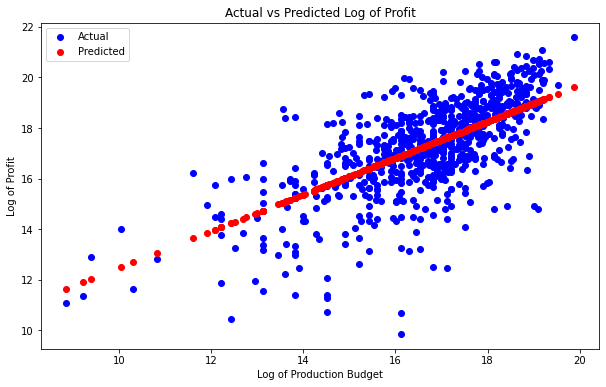

In [60]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
	tn_df[['log_production_budget']], tn_df['log_profit'], test_size=0.2, random_state=42
)

# Fit the model on the training data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
# Fit the model on the training data
regressor.fit(X_train, y_train)

# Calculate Mean Squared Error (MSE) on the test data

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test['log_production_budget'], y_pred, color='red', label='Predicted')
plt.xlabel('Log of Production Budget')
plt.ylabel('Log of Profit')
plt.title('Actual vs Predicted Log of Profit')
plt.legend()
plt.show()

The figure above is a scatter plot comparing the **actual** and **predicted log of profit** values for the test dataset. Here's the interpretation:

1. **Blue Points (Actual Values):**
    - These represent the actual log of profit values from the test dataset.
    - They show the true relationship between the log of production budget and log of profit.

2. **Red Points (Predicted Values):**
    - These represent the predicted log of profit values generated by the linear regression model.
    - They indicate how well the model approximates the actual values.
    - They closely align with the blue points (actual).

3. **Alignment:**
    - If the model performs well, the red points (predicted) should closely align with the blue points (actual).
    - Any significant deviation between the two indicates areas where the model's predictions are less accurate.

4. **Insights:**
    - The plot shows that the model captures the general trend of the data, but there may be some variance or error in the predictions.
    - The spread of points suggests that while the model is reasonably accurate

The visualization helps assess how well the model predicts the profits from
production budgets.

*Objective 2: Determine if there is a difference in audience ratings between the shorter and longer films*



We restrict the imdb_df DataFrame to include only movies with runtimes between 30 and 200 minutes, ensuring the analysis focuses on films with typical and realistic durations.

In [31]:
#Filter to keep movies with runtime between 30 and 200 minutes
relevant_movies_df = imdb_df[(imdb_df['runtime_minutes'] >= 30) & (imdb_df['runtime_minutes'] <= 200)]
relevant_movies_df.head()

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110,"Drama,Romance",6.4
1,nm0062879,Ruel S. Bayani,tt1592569,110,"Drama,Romance",6.4
2,nm0062879,Ruel S. Bayani,tt1592569,110,"Drama,Romance",6.4
3,nm0062879,Ruel S. Bayani,tt1592569,110,"Drama,Romance",6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,"Drama,Romance,Thriller",6.4


**Univariate Analysis**


**Distribution of Average rating*



The distribution of average ratings shows how movies are rated by viewers.

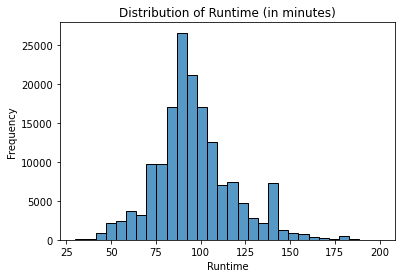

In [32]:
sns.histplot(relevant_movies_df['runtime_minutes'], bins=30, kde=False)
plt.title('Distribution of Runtime (in minutes)')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

The distribution of movie runtimes is roughly bell-shaped, resembling a normal distribution, but with a slight right skew.
The highest concentration of movies is between 90 and 100 minutes, suggesting that this is the most common length for films in the dataset.

**Plotting the distribution of Average rating**


The Distribution of average ratings illustrates how viewers evaluate movies, offering insight into audience perceptions of movie quality within the dataset.  

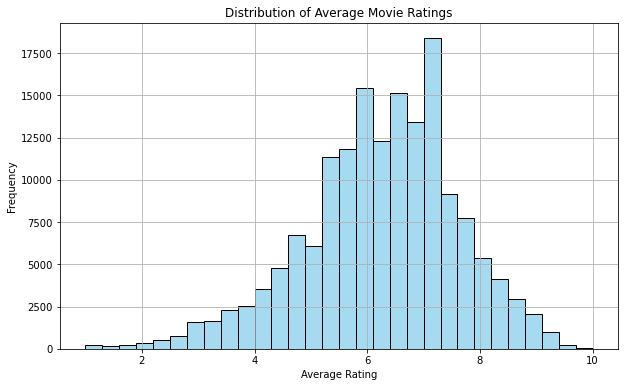

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(relevant_movies_df['averagerating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the above we can see that the highest concentration of the average movie  ratings is between around 5.9 and 7.5

**Bivariate Analysis**


In this section, we examine the relationship between a movie’s runtime and its average rating.This will help us explore how two continuous variables relate to one another—in this case, whether longer or shorter films tend to receive higher or lower audience ratings. Understanding this relationship can offer valuable insights for content planning and production decisions.

In [34]:
#create a copy of the imdb
filt_imdb = relevant_movies_df.copy()

In [35]:
#Create a new column categorizing movies as 'Shorter' or 'Longer'
filt_imdb['runtime_group'] = filt_imdb['runtime_minutes'].apply(
    lambda x: 'Longer' if x > 120 else 'Shorter')

# Display the first 20 rows of the new column
filt_imdb['runtime_group'].head(20)


0     Shorter
1     Shorter
2     Shorter
3     Shorter
4     Shorter
5     Shorter
6     Shorter
7     Shorter
10    Shorter
11    Shorter
12    Shorter
13    Shorter
14     Longer
15    Shorter
16    Shorter
17    Shorter
18    Shorter
19    Shorter
24    Shorter
25    Shorter
Name: runtime_group, dtype: object

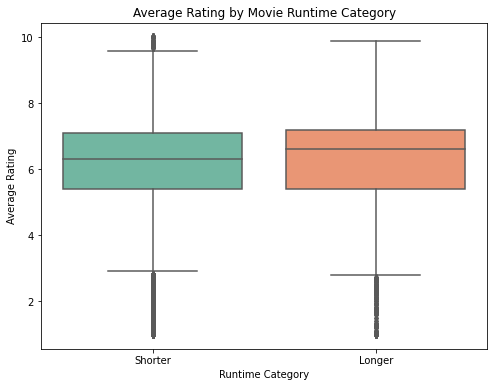

In [36]:
#Box plot for the runtime_group by movie average rating
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='runtime_group', y='averagerating', data=filt_imdb, palette='Set2')
plt.title('Average Rating by Movie Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Average Rating')
plt.show()

Overall, the plot suggests that longer movies might generally receive higher average ratings.

The box plot compares average ratings of movies based on their runtime categories—'Shorter' (≤120 minutes) and 'Longer' (>120 minutes). It reveals that longer movies tend to have a slightly higher median rating than shorter ones.

The rating distribution for longer movies shows greater variability, as indicated by a wider interquartile range.

### **Hypothesis Testing**


H₀: There is no  difference in audience ratings between the shorter and the longer films.

H₁: There is a  difference in audience ratings between the  shorter and the longer films.

In [37]:
#Group the data into 'Shorter' and 'Longer' based on the runtime_group column
Shorter = filt_imdb[filt_imdb['runtime_group'] == 'Shorter']['averagerating']
Longer = filt_imdb[filt_imdb['runtime_group'] == 'Longer']['averagerating']


In [38]:
#Testing for the equality of variances using the levene's test
from scipy.stats import levene

stat, p = levene(Shorter, Longer)
if p_value <= 0.05:
    print("The variances are not equal")
else:
    print("The variances are equal")


The variances are not equal


In [39]:

#Perform the t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(Shorter, Longer, equal_var=True)
print(f't-stat:{t_stat}, p_value: {p_value}')

t-stat:-18.1935941280581, p_value: 6.874392240583262e-74


**Decision**


Alpha = 0.05

So at 95% level of confidence we reject the null hypothesis and conclude that there is a statistically significant difference in the audience ratings between the shorter and the Longer films 

*Objetive 3: Identify the Best Directors to Work With*

To find the best directors to work with, we simply check for movie ratings then check the name of the associated director. The directors most associated with high ratings are our target

In [40]:
# Take the director name and the ratings of their movies from the imdb dataframe
directors_df = imdb_df[['primary_name', 'averagerating']]
directors_df

,primary_name,averagerating
0,Ruel S. Bayani,6.4
1,Ruel S. Bayani,6.4
2,Ruel S. Bayani,6.4
3,Ruel S. Bayani,6.4
4,Ruel S. Bayani,6.4
...,...,...
181381,Benjamin Ovesen,7.4
181382,Frank W Chen,5.8
181383,Frank W Chen,5.8
181384,Prasobh Vijayan,5.7


In [41]:
# Group the directors by their name to calculate the average rating of their movies
directors_df = directors_df.groupby('primary_name').agg(
    Average_Rating=('averagerating', 'mean'),
    Movie_Count=('averagerating', 'count')
).reset_index()

directors_df

,primary_name,Average_Rating,Movie_Count
0,A Normale Jef,7.20,46
1,A'Ali de Sousa,4.20,1
2,A. Blaine Miller,7.00,1
3,A. Cengiz Mert,3.20,1
4,A. Fishman,7.80,1
...,...,...,...
51618,Ümit Kivanç,7.90,2
51619,Ümit Köreken,6.40,3
51620,Ümit Uludag,9.20,1
51621,Ümit Ünal,5.95,4


In [42]:
# Sort the directors by the average rating of their movies
top_rated = directors_df.sort_values(by='Average_Rating', ascending=False).head(20)
top_rated

,primary_name,Average_Rating,Movie_Count
31509,Masahiro Hayakawa,10.0,1
28788,Loreto Di Cesare,10.0,2
14093,Emre Oran,10.0,1
28524,Lindsay Thompson,10.0,1
33519,Michiel Brongers,10.0,1
19699,Ivana Diniz,10.0,2
34776,Nagaraja Uppunda,9.9,1
2409,Amoghavarsha,9.9,1
39635,Raphael Sbarge,9.9,1
25632,Kalyan Varma,9.9,1


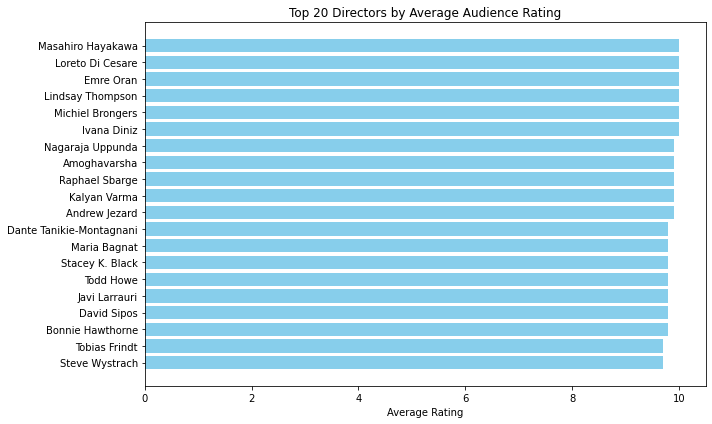

In [43]:
# visualize the top rated directors
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_rated['primary_name'], top_rated['Average_Rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 20 Directors by Average Audience Rating')
plt.gca().invert_yaxis()  # Highest rating at the top
plt.tight_layout()
plt.show()

The highest rated directors seem to have worked on very few movies. We need to find the ones with some experience in the industry

In [44]:
# Sort the directors by the number of movies directed to gauge their experience level
experienced_df = directors_df.sort_values(by='Movie_Count', ascending=False).head(10)
experienced_df

,primary_name,Average_Rating,Movie_Count
43999,Shane Ryan,5.626452,155
48323,Tony Newton,4.785385,130
41692,Ruben Rodriguez,6.079845,129
9600,Corey Norman,6.017757,107
21049,Jason Impey,5.158824,102
14792,Evan Marlowe,6.403000,100
20357,James Cullen Bressack,4.601020,98
37318,Patrick Rea,6.153933,89
19761,Izzy Lee,5.518293,82
16413,Gav Chuckie Steel,6.558025,81


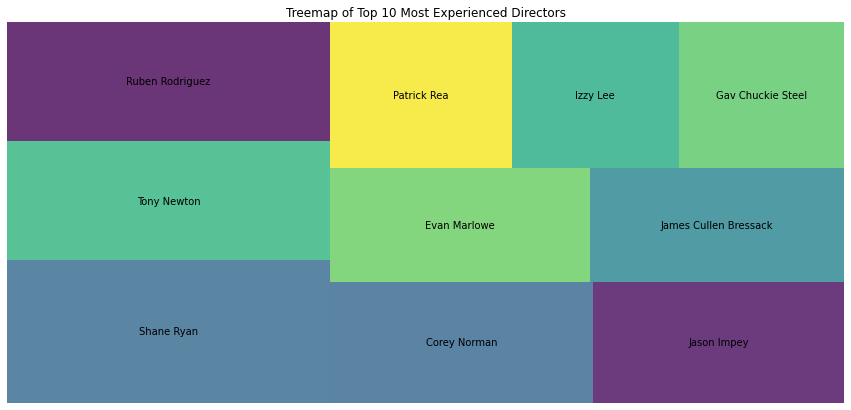

In [45]:
# visualize the most experienced directors
import squarify

plt.figure(figsize=(15, 7))
squarify.plot(sizes= experienced_df['Movie_Count'], label=experienced_df['primary_name'], alpha=.8)
plt.axis('off')
plt.title('Treemap of Top 10 Most Experienced Directors')
plt.show()


To find the best directors to recommend, we need to take into account both experience level and ratings. So we have to sort by movie count (experience) then pick the best rated among these

In [46]:
# sort directors by movie count then pick the best rated among these experienced directors
best_directors_df = directors_df.sort_values(by='Movie_Count', ascending=False).head(10)
best_directors_df

,primary_name,Average_Rating,Movie_Count
43999,Shane Ryan,5.626452,155
48323,Tony Newton,4.785385,130
41692,Ruben Rodriguez,6.079845,129
9600,Corey Norman,6.017757,107
21049,Jason Impey,5.158824,102
14792,Evan Marlowe,6.403000,100
20357,James Cullen Bressack,4.601020,98
37318,Patrick Rea,6.153933,89
19761,Izzy Lee,5.518293,82
16413,Gav Chuckie Steel,6.558025,81


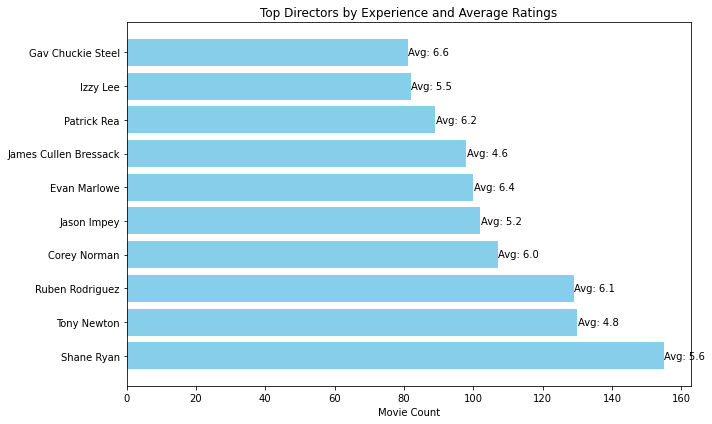

In [47]:
# visualize the data

plt.figure(figsize=(10, 6))
bars = plt.barh(best_directors_df['primary_name'],best_directors_df['Movie_Count'], color='skyblue')

# Annotate each bar with average rating
for bar, rating in zip(bars, best_directors_df['Average_Rating']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'Avg: {rating:.1f}', va='center')

plt.xlabel('Movie Count')
plt.title('Top Directors by Experience and Average Ratings')
plt.tight_layout()
plt.show()


Now we'll plot two axes to show both ratings and number of movies for each director on the same figure

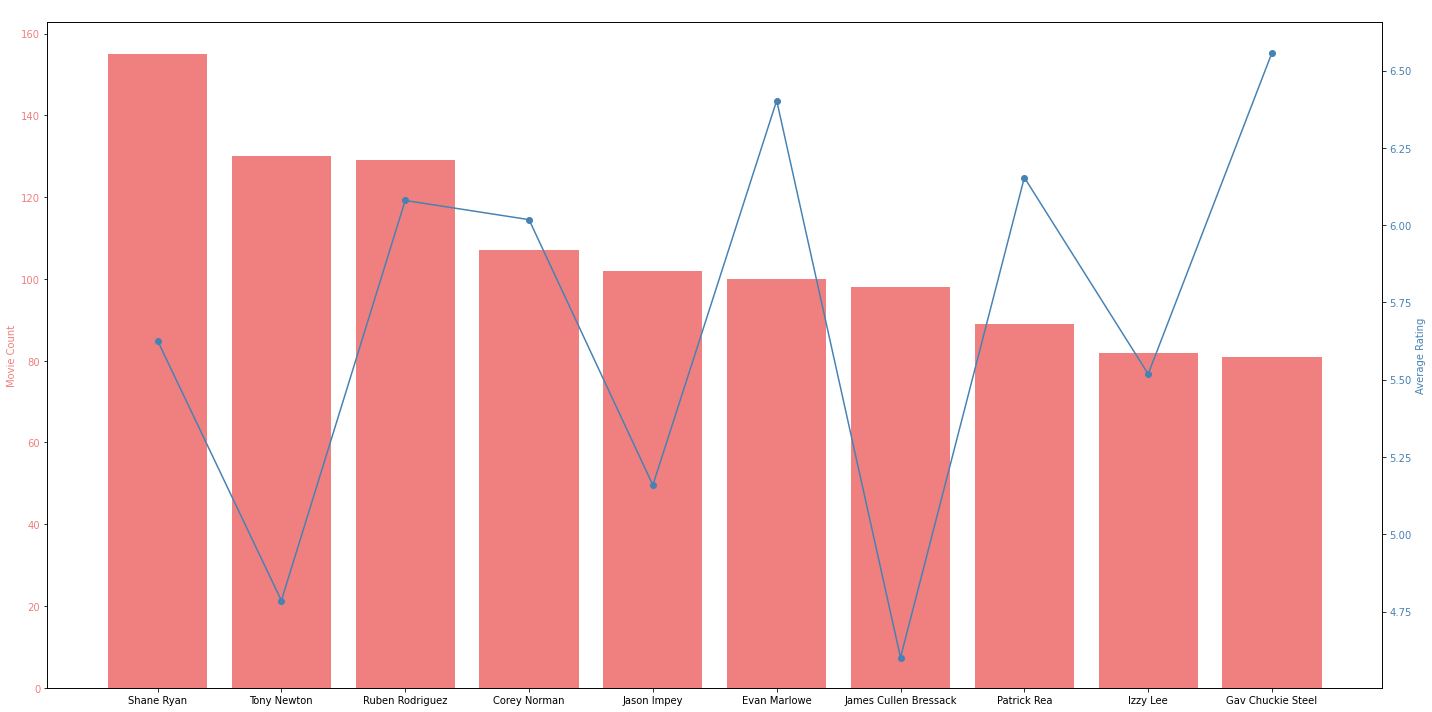

In [48]:
# plot a dual axis bar and line graphs
fig, ax1 = plt.subplots(figsize=(20, 10))

# Bar plot for movie count
ax1.bar(best_directors_df['primary_name'], best_directors_df['Movie_Count'], color='lightcoral')
ax1.set_ylabel('Movie Count', color='lightcoral')
ax1.tick_params(axis='y', labelcolor='lightcoral')

# Line plot for average rating
ax2 = ax1.twinx()
ax2.plot(best_directors_df['primary_name'], best_directors_df['Average_Rating'], color='steelblue', marker='o')
ax2.set_ylabel('Average Rating', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

plt.title('Best Directors: Movie Count (experience) and Average Rating', color = 'white')
plt.tight_layout()
plt.show()


*Objective 4: To identify the genres that are linked to high average rating*

In [49]:
imdb_df = imdb_df.drop_duplicates()
imdb_df

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110,"Drama,Romance",6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,"Drama,Romance,Thriller",6.4
7,nm0062879,Ruel S. Bayani,tt2590280,100,Drama,5.8
10,nm0064023,Bryan Beasley,tt4512140,53,Documentary,8.9
11,nm0067234,Hans Beimler,tt2098699,90,Drama,5.8
...,...,...,...,...,...,...
181380,nm9541799,Hamed Saleh,tt7849092,84,Comedy,6.5
181381,nm9701687,Benjamin Ovesen,tt8146836,55,Drama,7.4
181382,nm9748617,Frank W Chen,tt8234502,99,"Documentary,Sport",5.8
181384,nm9769561,Prasobh Vijayan,tt8273258,91,Thriller,5.7


**Handling Genre Data**

*Normalize Genre Data into Individual Rows*

Movies with multiple genres are split so each genre appears in its own row. This structure allows accurate per-genre analysis.


In [50]:
imdb_df['genres'] = imdb_df['genres'].str.split(',')
imdb_df = imdb_df.explode('genres')

imdb_df

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110,Drama,6.4
0,nm0062879,Ruel S. Bayani,tt1592569,110,Romance,6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,Drama,6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,Romance,6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,Thriller,6.4
...,...,...,...,...,...,...
181382,nm9748617,Frank W Chen,tt8234502,99,Documentary,5.8
181382,nm9748617,Frank W Chen,tt8234502,99,Sport,5.8
181384,nm9769561,Prasobh Vijayan,tt8273258,91,Thriller,5.7
181385,nm9781362,Grzegorz Jankowski,tt4438688,93,Comedy,5.2


**Calculating Average Rating by Genre**
*Compute Average Rating for Each Genre*
The dataset is grouped by genre, and the mean IMDb rating is calculated for each group. Results are sorted from highest to lowest rated genre.


In [51]:
genre_ratings = imdb_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
genre_ratings

genres
Short          8.800000
Documentary    7.300637
Game-Show      7.300000
News           7.263077
Biography      7.153383
Music          7.099956
History        7.053920
Sport          7.000296
War            6.596799
Musical        6.504895
Family         6.411190
Drama          6.397100
Animation      6.281203
Adventure      6.203876
Reality-TV     6.163636
Romance        6.146892
Crime          6.107764
Comedy         6.021834
Fantasy        5.921722
Mystery        5.900030
Western        5.859155
Action         5.786338
Thriller       5.575051
Sci-Fi         5.504845
Horror         4.968743
Adult          3.300000
Name: averagerating, dtype: float64

**Preparing Genre Ratings DataFrame for Analysis**
*Finalize Genre Ratings DataFrame*
The average ratings are reformatted into a clean DataFrame with clear column names and sorted values. Top 15 and Top 5 genres are selected for visualization.


In [52]:
# Group, average, and convert to a DataFrame with named columns
genre_ratings = imdb_df.groupby('genres')['averagerating'].mean().reset_index()

# Rename the columns for clarity
genre_ratings.columns = ['genre', 'average_rating']

# Sort the DataFrame by average_rating
genre_ratings = genre_ratings.sort_values(by='average_rating', ascending=False)

# Reset the index to remove numbers on the left
genre_ratings = genre_ratings.reset_index(drop=True)


# Create Top 15 and Top 5 DataFrames for plotting
top15 = genre_ratings.head(15).copy()
top5 = genre_ratings.head(5).copy()

# View the result
genre_ratings

,genre,average_rating
0,Short,8.800000
1,Documentary,7.300637
2,Game-Show,7.300000
3,News,7.263077
4,Biography,7.153383
5,Music,7.099956
6,History,7.053920
7,Sport,7.000296
8,War,6.596799
9,Musical,6.504895


**Visualizing Genre Ratings**
*Plot Top 15 IMDb Genres (Horizontal Bar Chart)*
Displays the 15 highest-rated genres using a horizontal bar chart for readability. Ratings are shown directly on each bar.


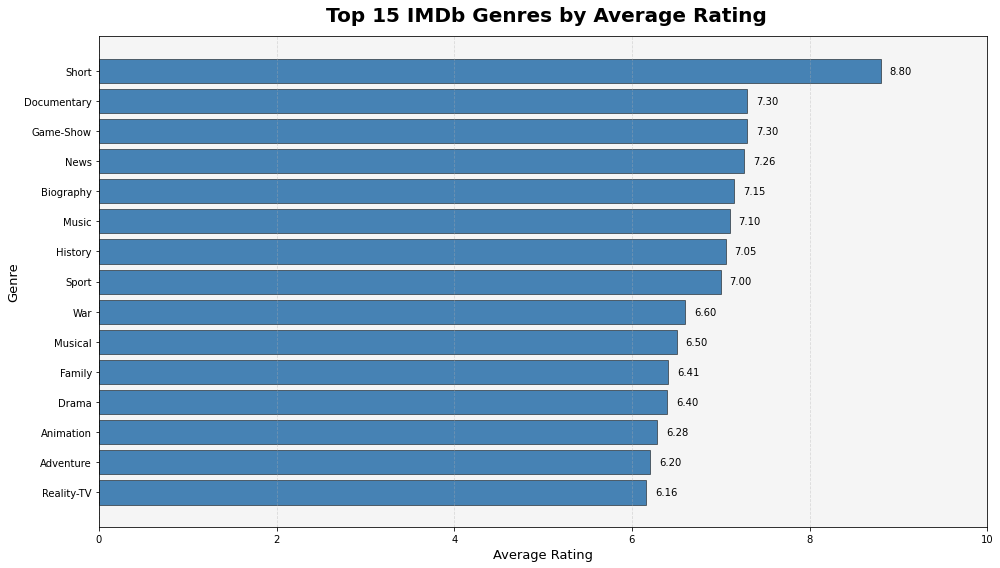

In [53]:
plt.figure(figsize=(14, 8))
bars = plt.barh(top15['genre'], top15['average_rating'],
                color='#4682B4', edgecolor='black', linewidth=0.5)

plt.gca().invert_yaxis()

# Add data labels
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}", va='center', fontsize=10)

# Style
plt.title(' Top 15 IMDb Genres by Average Rating', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Average Rating', fontsize=13)
plt.ylabel('Genre', fontsize=13)
plt.xlim(0, 10)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.gca().set_facecolor('#f5f5f5')
plt.tight_layout()
plt.show()

*Plot Top 5 Genres (Vertical Bar Chart)*
Highlights the top 5 genres with the highest average IMDb ratings. Includes annotations for clarity.


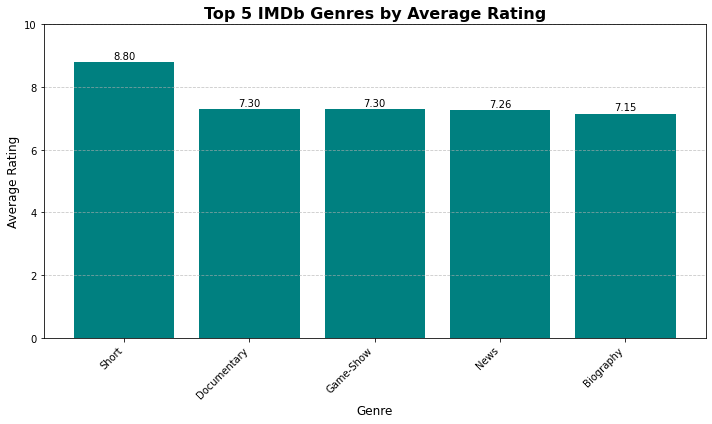

In [54]:
plt.figure(figsize=(10, 6))

# Bar plot
bars = plt.bar(top5['genre'], top5['average_rating'], color='teal')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.2f}", ha='center')

# Titles and labels
plt.title('Top 5 IMDb Genres by Average Rating', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

*Line Plot of Top 15 Genre Ratings*
A line chart is used to show trends in average ratings among the top 15 genres. Data labels are added for clarity.


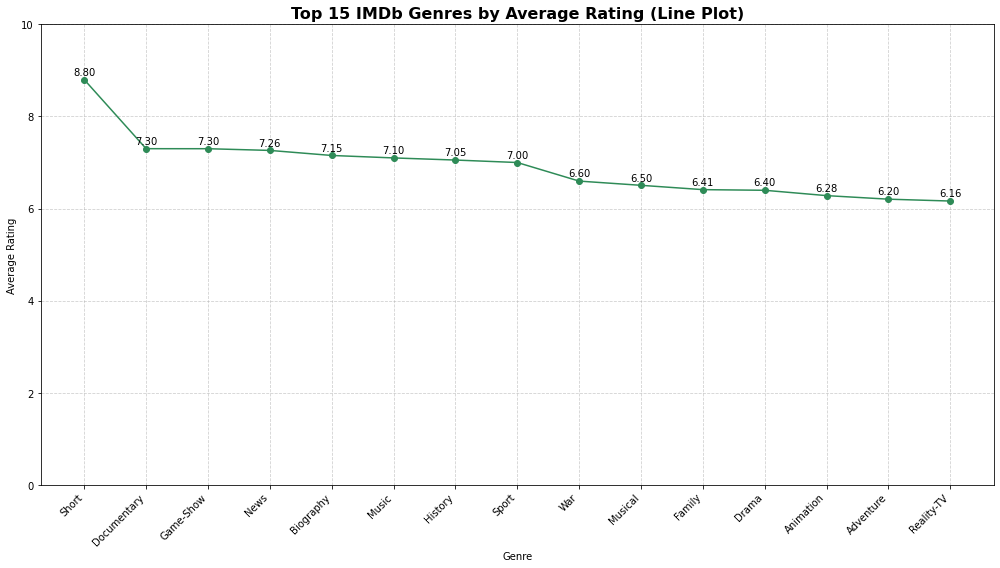

In [55]:
plt.figure(figsize=(14, 8))

# Line plot
plt.plot(top15['genre'], top15['average_rating'], marker='o', linestyle='-', color='seagreen')

# Add data labels
for i, (x, y) in enumerate(zip(top15['genre'], top15['average_rating'])):
    plt.text(i, y + 0.1, f"{y:.2f}", ha='center')

# Titles and labels
plt.title('Top 15 IMDb Genres by Average Rating (Line Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.ylim(0, 10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

*Bar Chart of Bottom 10 Genres by Rating*
Plots the 10 lowest-rated genres to highlight underperformers. Annotations provide specific average rating values.

 

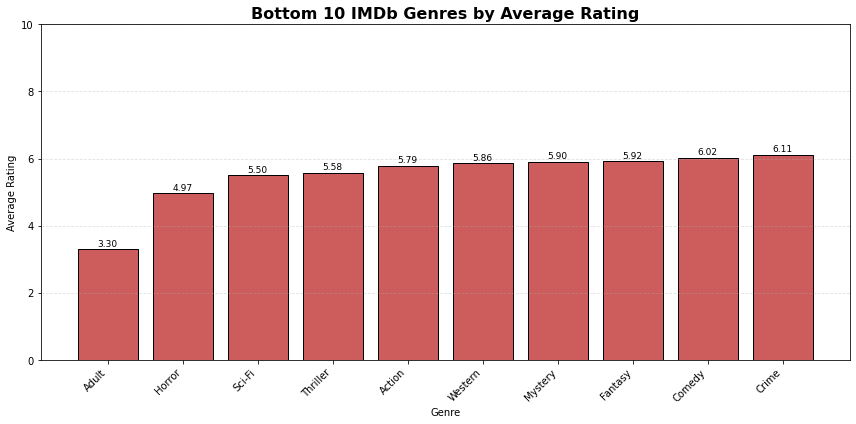

In [56]:
bottom10 = genre_ratings.tail(10).sort_values(by='average_rating')

plt.figure(figsize=(12, 6))
bars = plt.bar(bottom10['genre'], bottom10['average_rating'], color='indianred', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)

# Annotate
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.2f}", ha='center', fontsize=9)

plt.title('Bottom 10 IMDb Genres by Average Rating', fontsize=16, weight='bold')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


*IMDb Genre Ratings Summary Dashboard*
Combines top and bottom genres into one visual summary. Includes:
- Top 15 horizontal bar chart
- Top 5 vertical chart
- Bottom 10 genres
- Summary insights (highest/lowest-rated and most/least common genres)


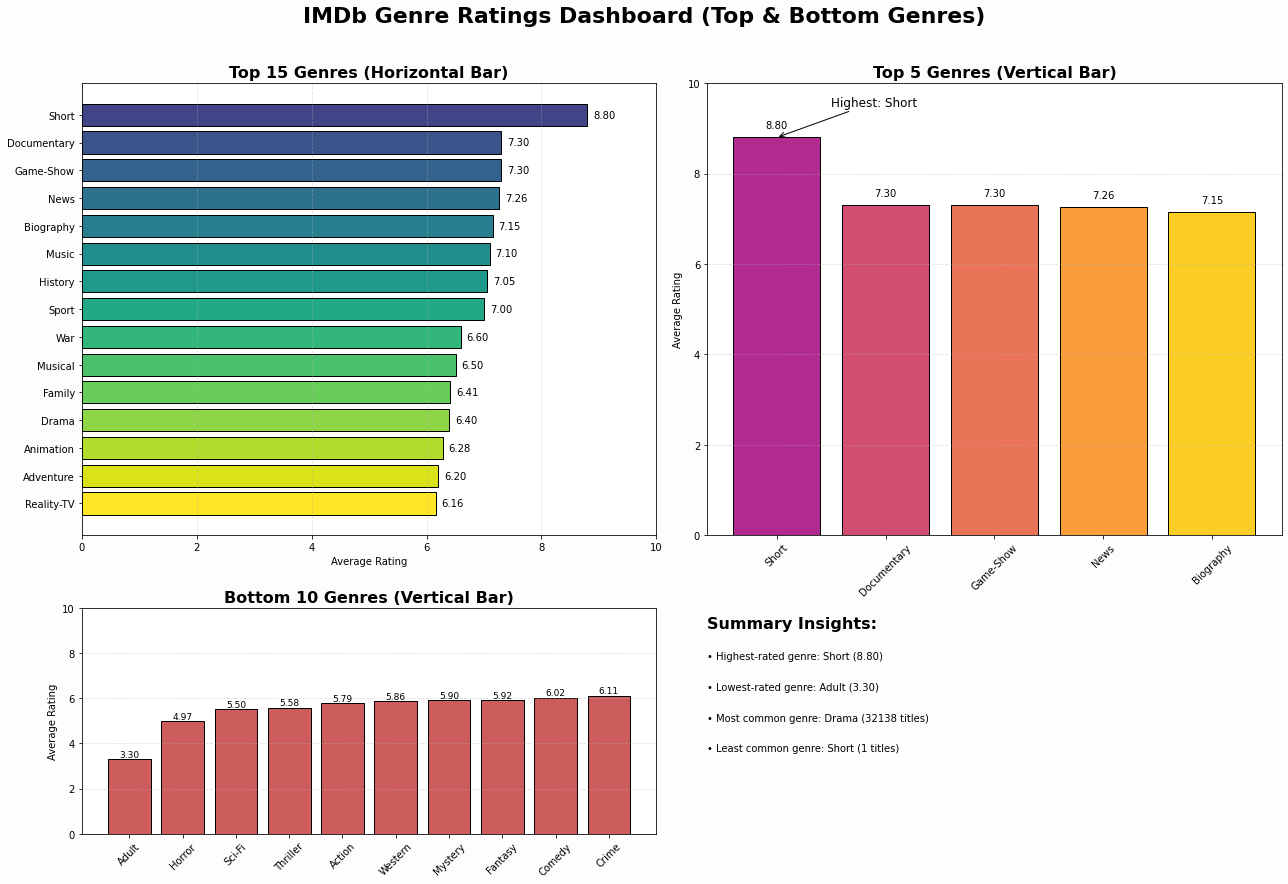

In [57]:
import matplotlib.cm as cm
import numpy as np


#  Data Preparation 
bottom10 = genre_ratings.tail(10).sort_values(by='average_rating')
top_genre = genre_ratings.iloc[0]
low_genre = genre_ratings.iloc[-1]

# Genre frequency for summary
genre_counts = imdb_df['genres'].value_counts()
most_common_genre = genre_counts.idxmax()
least_common_genre = genre_counts.idxmin()

# Plotting Layout 
fig, axs = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={'height_ratios': [2, 1]})
fig.patch.set_facecolor('#fdfdfd')  # Background color

# Subplot 1: Horizontal Bar Chart (Top 15) 
colors = cm.viridis(np.linspace(0.2, 1, len(top15)))
axs[0, 0].barh(top15['genre'], top15['average_rating'], color=colors, edgecolor='black')
axs[0, 0].invert_yaxis()
axs[0, 0].set_title('Top 15 Genres (Horizontal Bar)', fontsize=16, weight='bold')
axs[0, 0].set_xlabel('Average Rating')
axs[0, 0].set_xlim(0, 10)
axs[0, 0].grid(axis='x', linestyle='--', alpha=0.4)
for i, rating in enumerate(top15['average_rating']):
    axs[0, 0].text(rating + 0.1, i, f"{rating:.2f}", va='center', fontsize=10)

# Subplot 2: Vertical Bar Chart (Top 5) 
colors5 = cm.plasma(np.linspace(0.4, 0.9, len(top5)))
bars = axs[0, 1].bar(top5['genre'], top5['average_rating'], color=colors5, edgecolor='black')
axs[0, 1].set_title('Top 5 Genres (Vertical Bar)', fontsize=16, weight='bold')
axs[0, 1].set_ylabel('Average Rating')
axs[0, 1].set_ylim(0, 10)
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.4)
axs[0, 1].annotate(f"Highest: {top_genre['genre']}",
                   xy=(0, top_genre['average_rating']),
                   xytext=(0.5, 9.5),
                   arrowprops=dict(facecolor='black', arrowstyle='->'),
                   fontsize=12)
for bar in bars:
    axs[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                   f"{bar.get_height():.2f}", ha='center', fontsize=10)

# Subplot 3: Bottom 10 Genres 
bars = axs[1, 0].bar(bottom10['genre'], bottom10['average_rating'], color='indianred', edgecolor='black')
axs[1, 0].set_title('Bottom 10 Genres (Vertical Bar)', fontsize=16, weight='bold')
axs[1, 0].set_ylabel('Average Rating')
axs[1, 0].set_ylim(0, 10)
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.4)
for bar in bars:
    yval = bar.get_height()
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.2f}", ha='center', fontsize=9)

# Subplot 4: Summary Insights 
axs[1, 1].axis('off')
axs[1, 1].text(0, 1.0, 'Summary Insights:', fontsize=16, weight='bold')
axs[1, 1].text(0, 0.85, f"• Highest-rated genre: {top_genre['genre']} ({top_genre['average_rating']:.2f})")
axs[1, 1].text(0, 0.70, f"• Lowest-rated genre: {low_genre['genre']} ({low_genre['average_rating']:.2f})")
axs[1, 1].text(0, 0.55, f"• Most common genre: {most_common_genre} ({genre_counts.max()} titles)")
axs[1, 1].text(0, 0.40, f"• Least common genre: {least_common_genre} ({genre_counts.min()} titles)")
axs[1, 1].set_xlim(0, 1)
axs[1, 1].set_ylim(0, 1.1)

# Final Layout 
plt.suptitle('IMDb Genre Ratings Dashboard (Top & Bottom Genres)', fontsize=22, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## **Conclusions**
 
1.Increasing the production budget often leads to higher profits
 
2.Movies with larger production budgets typically achieve higher worldwide gross revenues.

3.There is a difference in the audience ratings between the shorter and the longer films

4.Longer films tend to have a slightly higher median rating than shorter ones.

5.The rating distribution for longer movies shows greater variability, as indicated by a wider interquartile range.

6.As shown the genre Short has high ratings but few titles, it indicates potential low competition and high demand





 

## **Recommendations**

1.Enhance Profitability Tracking: Implement metrics for profit margin and return on investment (ROI) to better evaluate the success of each project.

2.Refine Budget Allocation Strategies: Invest in production budgets that are high enough to drive profitability, but remain mindful of overspending.

3.Analyze past performance to identify a budget threshold that maximizes returns without crossing into diminishing profit margins.
 
4.Prioritize Top-Rated Genres for Critical Acclaim: Genres like Short, Documentary, Game Show consistently receive the highest average IMDb ratings.

5.Consider producing at least one high-quality film in one of the above top-rated genre to build studio credibility and recognition.

6.Consider Investing in Longer-Format Films


7.Since longer films tend to receive slightly higher audience ratings, allocating more resources to developing or acquiring quality longer-format content could enhance audience satisfaction and brand reputation.

8.Focus on Quality Storytelling for Long Films


9.The wider variability in ratings for long movies suggests they can either perform very well or poorly. 

10.Focus on strong scripts, editing, and pacing to ensure that longer runtimes deliver consistent viewer engagement.

11.Explore Underserved but High-Rated Genres: Some highly-rated genres may also be among the least common. As shown the genre Short has high ratings but few titles, it indicates potential low competition and high demand.Target these niches for original and impactful storytelling that can stand out and attract good ratings.

12.Leverage Popular Genres for Commercial Success:The most common genre, Drama, may not be the highest rated but indicates broad market appeal and a large audience.Add at least one movie in a popular genre like Drama to help draw in more viewers and boost your revenue.

13.From the visualizations, the best directors out of these according to their ratings and experience are: Sergey A., Evan MarlowePatrick ,ReaRuben Rodriguez and Corey Norman













